# Logistic Regression Continued

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

In [66]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [67]:
penguins = pd.read_csv('DATA/penguins.csv')

In [68]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         344 non-null    int64  
 1   species            344 non-null    object 
 2   island             344 non-null    object 
 3   bill_length_mm     342 non-null    float64
 4   bill_depth_mm      342 non-null    float64
 5   flipper_length_mm  342 non-null    float64
 6   body_mass_g        342 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [69]:
penguins = penguins.drop(columns=penguins.columns[0])
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [70]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


So, it looks like we have three categorical variables, all of type object:
species, island, and sex

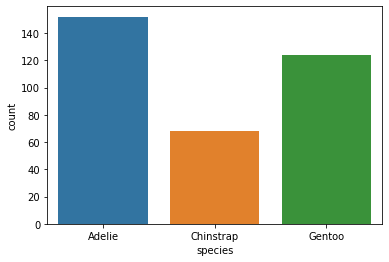

In [71]:

sns.countplot(penguins['species'])

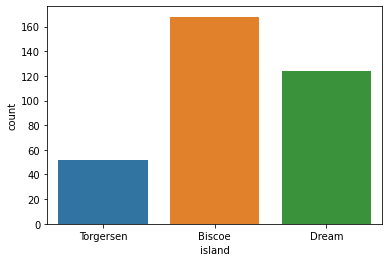

In [72]:
sns.countplot(penguins['island'])

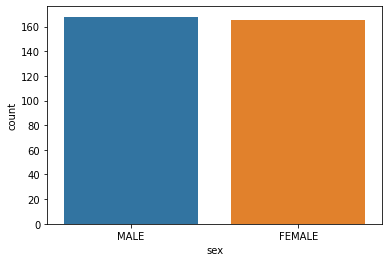

In [73]:
sns.countplot(penguins['sex'])

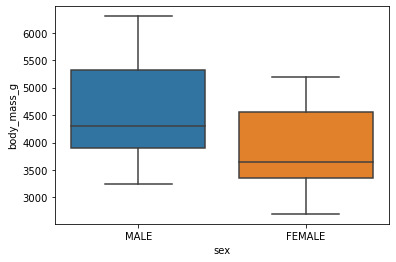

In [74]:
sns.boxplot( 'sex', 'body_mass_g', data=penguins)

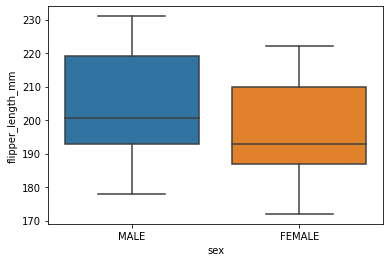

In [75]:
sns.boxplot( 'sex', 'flipper_length_mm', data=penguins)

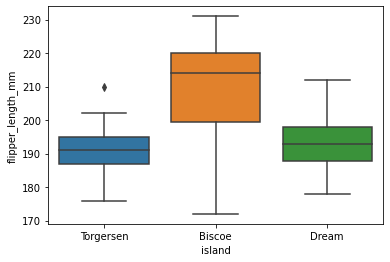

In [76]:
sns.boxplot( 'island', 'flipper_length_mm', data=penguins)

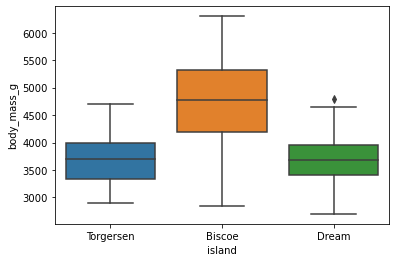

In [77]:
sns.boxplot( 'island', 'body_mass_g', data=penguins)

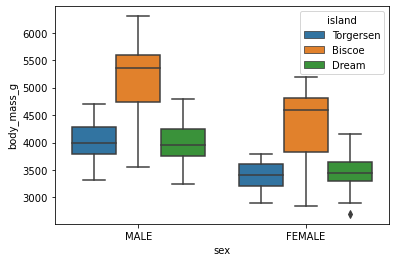

In [78]:
sns.boxplot( 'sex', 'body_mass_g', hue='island', data=penguins)

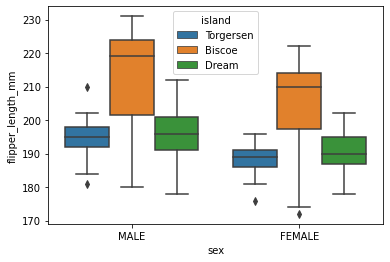

In [79]:
sns.boxplot( 'sex', 'flipper_length_mm', hue='island', data=penguins)

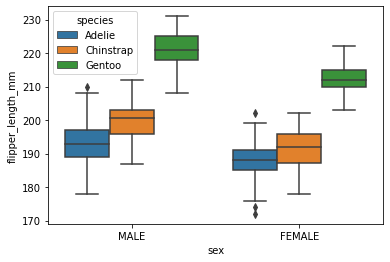

In [80]:
sns.boxplot( 'sex', 'flipper_length_mm', hue='species', data=penguins)

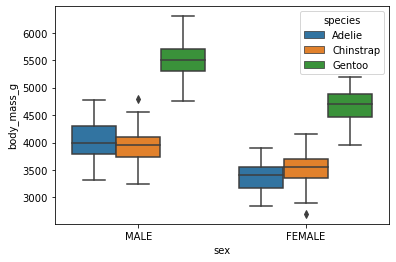

In [81]:
sns.boxplot( 'sex', 'body_mass_g', hue='species', data=penguins)

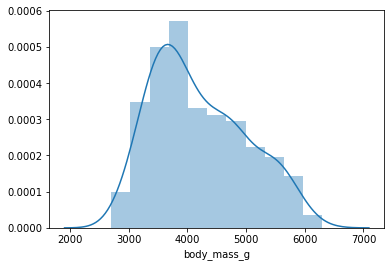

In [82]:
sns.distplot(penguins['body_mass_g'])

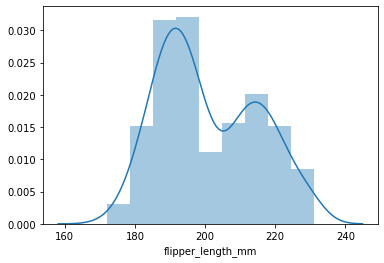

In [83]:
sns.distplot(penguins['flipper_length_mm'])

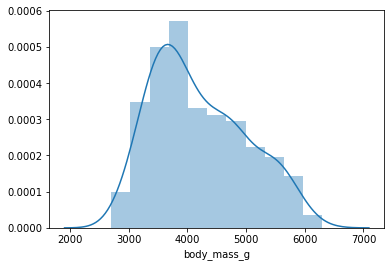

In [84]:
sns.distplot(penguins['body_mass_g'])

## So there is a lot of interesting variations in the penguin 'species' among our three categoricals!
However, to use the smf.logit function, we need BINARY variable

### We need to decide exactly WHAT we want to model.

Suggestions??

In [86]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [87]:
train, test = statsmodels_train_test_split(penguins)

In [88]:
penguins['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Note that these value_counts are not evenly distributed..

### Now, let's throw in the whole kitchen sink to try to model the species!

### Recall there are THREE types of species

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 96 to 109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             258 non-null    object 
 1   bill_length_mm     257 non-null    float64
 2   bill_depth_mm      257 non-null    float64
 3   flipper_length_mm  257 non-null    float64
 4   body_mass_g        257 non-null    float64
 5   sex                249 non-null    object 
 6   species            258 non-null    object 
dtypes: float64(4), object(3)
memory usage: 16.1+ KB


In [90]:
train['species'].value_counts()

Adelie       118
Gentoo        89
Chinstrap     51
Name: species, dtype: int64

In [91]:
species_names = ['Adelie', 'Gentoo','Chinstrap' ]

In [92]:
## unfortunately, statsmodels cannot deal with objects on the LHS. It likes numbers there! Sigh. 

In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit(train['species'])
le

LabelEncoder()

In [94]:
le.transform(train['species'])

array([0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0,
       2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 2, 2, 2,
       2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 2,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 2, 0, 1, 2, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0, 0, 2,
       2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0])

In [95]:
# let's add a new column called species code that we can add to our dataframe
train.loc[:,'species_code'] = le.transform(train['species'])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 96 to 109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             258 non-null    object 
 1   bill_length_mm     257 non-null    float64
 2   bill_depth_mm      257 non-null    float64
 3   flipper_length_mm  257 non-null    float64
 4   body_mass_g        257 non-null    float64
 5   sex                249 non-null    object 
 6   species            258 non-null    object 
 7   species_code       258 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 18.1+ KB


In [96]:
train.head(10)

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species,species_code
96,Dream,38.1,18.6,190.0,3700.0,FEMALE,Adelie,0
270,Biscoe,46.6,14.2,210.0,4850.0,FEMALE,Gentoo,2
269,Biscoe,45.2,15.8,215.0,5300.0,MALE,Gentoo,2
53,Biscoe,42.0,19.5,200.0,4050.0,MALE,Adelie,0
99,Dream,43.2,18.5,192.0,4100.0,MALE,Adelie,0
167,Dream,50.5,19.6,201.0,4050.0,MALE,Chinstrap,1
133,Dream,37.5,18.5,199.0,4475.0,MALE,Adelie,0
249,Biscoe,50.0,15.3,220.0,5550.0,MALE,Gentoo,2
187,Dream,47.5,16.8,199.0,3900.0,FEMALE,Chinstrap,1
285,Biscoe,49.8,16.8,230.0,5700.0,MALE,Gentoo,2


In [32]:
# let's try to normalize the columns by subtracting the mean and dividing by the standard deviation

bill_length_mm_mean = train['bill_length_mm'].mean()
bill_length_mm_std = train['bill_length_mm'].std()
bill_depth_mm_mean = train['bill_depth_mm'].mean()
bill_depth_mm_std = train['bill_depth_mm'].std()
flipper_length_mm_mean = train['flipper_length_mm'].mean()
flipper_length_mm_std = train['flipper_length_mm'].std()
body_mass_g_mean = train['body_mass_g'].mean()
body_mass_g_std = train['body_mass_g'].std()

In [33]:
train['bill_length_mm'].apply(lambda x: (x - bill_length_mm_mean)/bill_length_mm_std)

323    0.902736
216   -0.131475
227    0.459502
293    0.422566
213    0.477971
         ...   
174   -0.186879
316    0.958140
3           NaN
49    -0.353091
315    1.216692
Name: bill_length_mm, Length: 86, dtype: float64

In [34]:
train.loc[:,'bill_length_standardized'] = train['bill_length_mm'].apply(lambda x: (x - bill_length_mm_mean)/bill_length_mm_std)

In [35]:
train.loc[:,'bill_depth_standardized'] = train['bill_depth_mm'].apply(lambda x: (x - bill_depth_mm_mean)/bill_depth_mm_std)

In [36]:
train.loc[:,'flipper_length_standardized'] = train['flipper_length_mm'].apply(lambda x: (x - flipper_length_mm_mean)/flipper_length_mm_std)

In [37]:
train.loc[:,'body_mass_g_standardized'] = train['body_mass_g'].apply(lambda x: (x - body_mass_g_mean)/body_mass_g_std)

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 96 to 109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             258 non-null    object 
 1   bill_length_mm     257 non-null    float64
 2   bill_depth_mm      257 non-null    float64
 3   flipper_length_mm  257 non-null    float64
 4   body_mass_g        257 non-null    float64
 5   sex                249 non-null    object 
 6   species            258 non-null    object 
 7   species_code       258 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 18.1+ KB


In [107]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [39]:
train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_code,bill_length_standardized,bill_depth_standardized,flipper_length_standardized,body_mass_g_standardized
count,84.000000,84.000000,84.000000,84.000000,86.000000,8.400000e+01,8.400000e+01,8.400000e+01,8.400000e+01
mean,44.211905,16.961905,202.380952,4277.976190,1.000000,-1.321694e-15,-7.930164e-18,8.458842e-17,-4.414458e-16
std,5.414759,2.063854,14.709971,829.105382,0.907485,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,33.500000,13.100000,172.000000,2850.000000,0.000000,-1.978279e+00,-1.871210e+00,-2.065331e+00,-1.722310e+00
25%,39.600000,15.150000,190.000000,3600.000000,0.000000,-8.517285e-01,-8.779228e-01,-8.416708e-01,-8.177202e-01
50%,44.750000,17.050000,198.000000,4200.000000,1.000000,9.937566e-02,4.268481e-02,-2.978220e-01,-9.404859e-02
75%,48.425000,18.600000,215.000000,4943.750000,2.000000,7.780762e-01,7.937068e-01,8.578567e-01,8.030026e-01
max,59.600000,21.500000,231.000000,6300.000000,2.000000,2.841880e+00,2.198845e+00,1.945554e+00,2.438802e+00


In [100]:
# Now we can properly use statsmodels


In [112]:
formula = 'species_code ~ bill_length_mm + bill_depth_mm + flipper_length_mm  + C(sex) + C(island)'


In [115]:
# We use smf.mnlogit because species has more than two choices!!!!!
fitted_model = smf.mnlogit(formula=formula, data=train).fit(method='ncg')


fitted_model.summary() 

         Current function value: 0.000059
         Iterations: 35
         Function evaluations: 52
         Gradient evaluations: 52
         Hessian evaluations: 35


/Users/seanreed1/miniconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:           species_code   No. Observations:                  249
Model:                        MNLogit   Df Residuals:                      235
Method:                           MLE   Df Model:                           12
Date:                Wed, 09 Sep 2020   Pseudo R-squ.:                  0.9999
Time:                        20:10:41   Log-Likelihood:              -0.014761
converged:                      False   LL-Null:                       -261.78
Covariance Type:            nonrobust   LLR p-value:                2.172e-104
==========================================================================================
        species_code=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -51.7595    751.063     -0.069      0.945   -1523.815    1420.296
C(sex)[T.MALE]           -19.1182    480.014     -0.040      0.968    -959.929     921.693
C(island)[T.Dream]       -13.6280    324.082     -0.042      0.966    -648.818     621.562
C(island)[T.Torgersen]   -20.8565    536.376     -0.039      0.969   -1072.135    1030.422
bill_length_mm            12.7385    171.175      0.074      0.941    -322.758     348.235
bill_depth_mm            -22.4473    332.895     -0.067      0.946    -674.910     630.016
flipper_length_mm         -0.3814      9.202     -0.041      0.967     -18.416      17.654
------------------------------------------------------------------------------------------
        species_code=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.3446   3190.973     -0.000      1.000   -6255.537    6252.848
C(sex)[T.MALE]            -2.2449   1377.599     -0.002      0.999   -2702.289    2697.800
C(island)[T.Dream]        -5.2807   2608.256     -0.002      0.998   -5117.368    5106.807
C(island)[T.Torgersen]    -5.7595   1935.554     -0.003      0.998   -3799.375    3787.856
bill_length_mm            11.7491    190.200      0.062      0.951    -361.035     384.533
bill_depth_mm            -33.9431   1001.120     -0.034      0.973   -1996.101    1928.215
flipper_length_mm          0.4755     77.388      0.006      0.995    -151.203     152.154
==========================================================================================
"""

In [ ]:
# We use smf.mnlogit because species has more than two choices!!!!!
fitted_model = smf.mnlogit(formula=formula, data=train).fit(maxiter=100)


fitted_model.summary() 

In [ ]:
# It's best practices to define whatever functions you might need at the top of your notebook

In [ ]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)


In [ ]:
# statsmodels_train_test_split directly uses the train_test_split function from sklearn.
# You can pass the same parameters to statsmodels_train_test_split that you can pass to sklearn's train_test_split!
# So, what parameters can you pass to sklearn's 'train_test_split anyway??

train_test_split??  ## this is going to give a lot of output, but please focus on the Parameters

In [ ]:
'''
These are the MOST IMPORTANT ARGUMENTS OF the sklearn train_test_split function (and mine as well)

train_test_split(*arrays, test_size=0.25 ,random_state=NONE , stratify=None)
'''

In [ ]:
'''
Parameters
    ----------
*arrays: 
        sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.

**options (valid keyword arguments):
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also None, it will
        be set to 0.25.

    train_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the
        proportion of the dataset to include in the train split. If
        int, represents the absolute number of train samples. If None,
        the value is automatically set to the complement of the test size.

    random_state : int or RandomState instance, default=None
        Controls the shuffling applied to the data before applying the split.
        Pass an int for reproducible output across multiple function calls.
        See :term:`Glossary <random_state>`.


    shuffle : bool, default=True
        Whether or not to shuffle the data before splitting. If shuffle=False
        then stratify must be None.

    stratify : array-like, default=None
        If not None, data is split in a stratified fashion, using this as
        the class labels.

'''

#### What does *test_size* do?

#### What does *random_state* do?

#### What does *stratify* do? We'll talk about that below. 

## IMPORTANT: **ALWAYS** use **stratify** when you do train_test_splits for logistic regression!!!

## To do a logistic regression model, you use the statsmodel *logit* function in the exact same way that you used the statsmodel *ols* function.

### The return of true positive, false positive, true negative, false negative! Work out which number is which!

true negative =

true positive = 

false positive =

false negative =

### Note: pred_table[i,j] refers to the number of times “i” was observed and the model predicted “j”. 

In [ ]:
'''Calculate the confusion matrix for the test set
 Notes
        -----
        [i,j] refers to the number of times "i" was observed and
        the model predicted "j". Correct predictions are along the diagonal.
'''

In [ ]:
confusion_matrix(test['admit'], y_prediction_test)

In [ ]:
TP = 8
TN = 63
FP = 2
FN = 27
